In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm
import sys
sys.path.append("../")
import constants
import environment


import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter
import evaluate_models as ev


In [4]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2

In [5]:
env = gym.make('SQLstruct-v1')
folder = ""
log_dirs = ["ignore_logs/" + str(i) + "/" for i in range(n_simulations)]

In [7]:
xs, ys = [], []
for i in range(n_simulations):
    x, y = ts2xy(load_results(log_dirs[i]), 'timesteps')
    xs.append(x)
    ys.append(y)

In [8]:
longest_y = max([len(ys[i]) for i in range(n_simulations)])
extended_ys = np.zeros((n_simulations,longest_y))
query_count = np.zeros((n_simulations, longest_y), dtype = np.int)
for i in (range(n_simulations)):
    extended_ys[i,:len(ys[i])] = ys[i]
    extended_ys[i,len(ys[i]):] = ys[i][-1]
    
    query_count[i,:len(xs[i])] = xs[i]
    query_count[i,len(xs[i]):] = xs[i][-1]
    
queries_per_episode = np.diff(query_count, axis = 1,prepend=0)

1


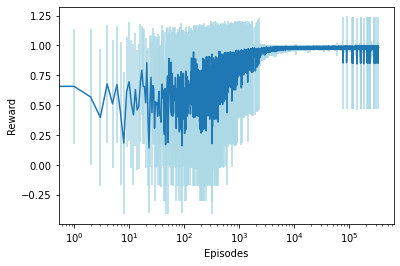

2


In [13]:
print(1)
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.set_xscale("log")

plt.errorbar(range(longest_y), np.mean(extended_ys, axis = 0), yerr = np.std(extended_ys, axis = 0), ecolor="lightblue")
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.savefig("figures/train_reward_per_episode.png")
plt.show()
print("2")

1


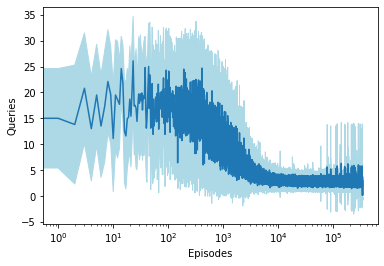

2


In [32]:
print(1)
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.set_xscale("log")

#plt.errorbar(range(longest_y), np.mean(queries_per_episode, axis = 0), yerr = np.std(queries_per_episode, axis = 0), ecolor="lightblue")
plt.plot(range(longest_y), np.mean(queries_per_episode, axis = 0))
plt.fill_between(range(longest_y), np.mean(queries_per_episode, axis = 0) - np.std(queries_per_episode, axis = 0), np.mean(queries_per_episode, axis = 0) + np.std(queries_per_episode, axis = 0), color="lightblue")
plt.xlabel('Episodes')
plt.ylabel('Queries')
plt.savefig("figures/train_queries_per_episode.png")
plt.show()
print("2")

1


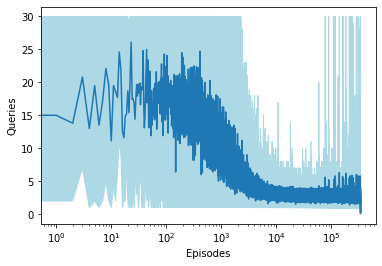

In [31]:
print(1)
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.set_xscale("log")

mean_queries = np.mean(queries_per_episode, axis = 0)
some = queries_per_episode-mean_queries
lims = np.abs(np.array([np.min(some, axis = 0),np.max(some, axis = 0)]))
#plt.errorbar(range(longest_y), mean_queries, yerr = lims, ecolor="lightblue")
plt.plot(range(longest_y), mean_queries)
plt.fill_between(range(longest_y), mean_queries-lims[0], mean_queries+lims[1], color= "lightblue")
plt.xlabel('Episodes')
plt.ylabel('Queries')
plt.savefig("figures/train_queries_per_episode_max_min.png")

In [1]:
#Extra visuals

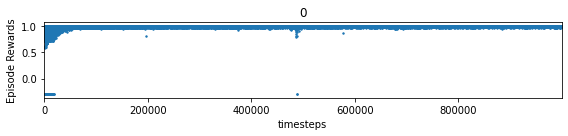

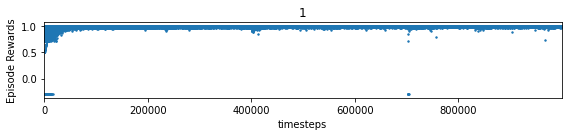

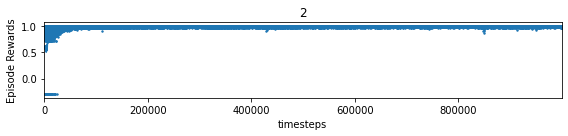

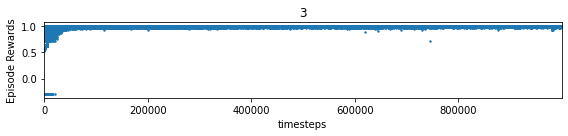

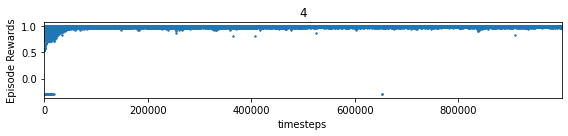

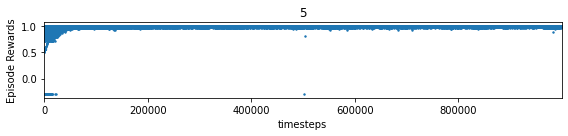

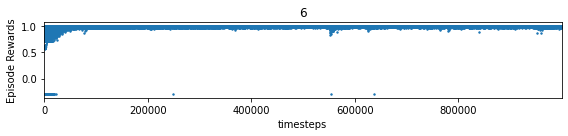

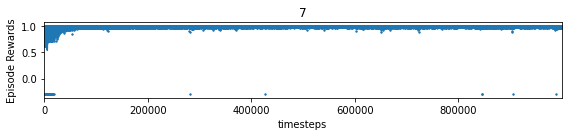

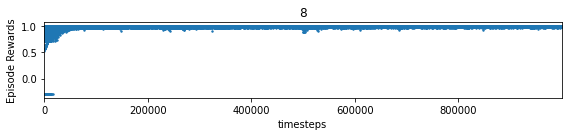

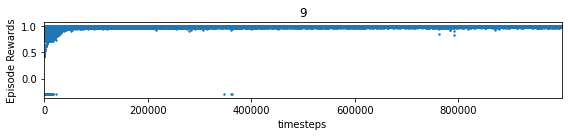

In [11]:
for i in range(n_simulations):
    results_plotter.plot_results([log_dirs[i]], n_episodes_training, results_plotter.X_TIMESTEPS, "" + str(i))
    plt.show()
    plt.close("all")

1


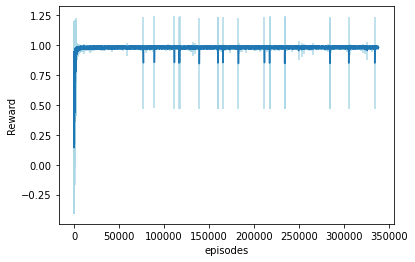

2


In [12]:
print(1)
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
#ax.set_xscale("log")

plt.errorbar(range(longest_y), np.mean(extended_ys, axis = 0), yerr = np.std(extended_ys, axis = 0), ecolor="lightblue")
plt.xlabel('episodes')
plt.ylabel('Reward')
plt.show()
print("2")